# EDA of "New Coder Survey 2016"
[Free code camp](https://www.freecodecamp.org/) conducted a survey in 2016 to understand new coders. Over 15000 new coders respondended to 48 questions.

In [2]:
# Loading packages
library(tidyverse)

#Reading data
survey <- read_csv("2016-FCC-New-Coders-Survey-Data.csv") ;

Parsed with column specification:
cols(
  .default = col_integer(),
  BootcampName = col_character(),
  CityPopulation = col_character(),
  CodeEventBootcamp = col_character(),
  CodeEventDjangoGirls = col_character(),
  CodeEventGameJam = col_character(),
  CodeEventMeetup = col_character(),
  CodeEventOther = col_character(),
  CodeEventRailsGirls = col_character(),
  CodeEventWorkshop = col_character(),
  CountryCitizen = col_character(),
  CountryLive = col_character(),
  EmploymentField = col_character(),
  EmploymentFieldOther = col_character(),
  EmploymentStatus = col_character(),
  EmploymentStatusOther = col_character(),
  Gender = col_character(),
  ID.x = col_character(),
  ID.y = col_character(),
  JobApplyWhen = col_character(),
  JobPref = col_character()
  # ... with 17 more columns
)
See spec(...) for full column specifications.


In [4]:
#View the summary
summary(survey)

      Age        AttendedBootcamp  BootcampFinish  BootcampFullJobAfter
 Min.   :10.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000       
 1st Qu.:23.00   1st Qu.:0.00000   1st Qu.:0.000   1st Qu.:0.000       
 Median :27.00   Median :0.00000   Median :1.000   Median :1.000       
 Mean   :29.18   Mean   :0.06196   Mean   :0.689   Mean   :0.584       
 3rd Qu.:33.00   3rd Qu.:0.00000   3rd Qu.:1.000   3rd Qu.:1.000       
 Max.   :86.00   Max.   :1.00000   Max.   :1.000   Max.   :1.000       
 NA's   :2007    NA's   :240       NA's   :14687   NA's   :14985       
 BootcampLoanYesNo BootcampMonthsAgo BootcampName       BootcampPostSalary
 Min.   :0.000     Min.   :  0.000   Length:15620       Min.   :  6000    
 1st Qu.:0.000     1st Qu.:  3.000   Class :character   1st Qu.: 50000    
 Median :0.000     Median :  6.000   Mode  :character   Median : 60000    
 Mean   :0.333     Mean   :  9.055                      Mean   : 63741    
 3rd Qu.:1.000     3rd Qu.: 12.000               

### Cleaning Data


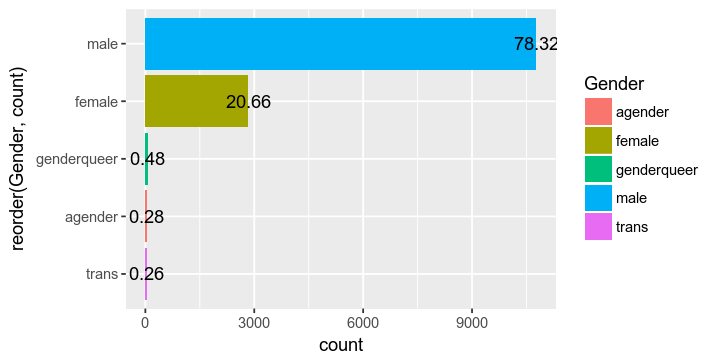

In [67]:
# Setting the size of plots in this notebook
options(repr.plot.width=6, repr.plot.height=3)

#Gender Distribution
survey %>%
  filter(!is.na(Gender)) %>%
  group_by(Gender) %>%
  summarize(count = n()) %>%
  mutate(pct = count/ sum(count) * 100 ) %>%
  ggplot(aes(x= reorder(Gender, count), y = count, fill = Gender)) + 
  geom_bar(stat = "identity") + geom_text(aes(label = round(pct, digits= 2))) + coord_flip()

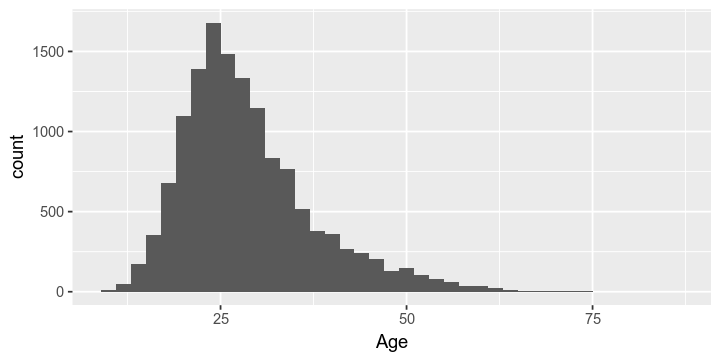

In [72]:
#Age distribution
survey %>%
  filter(!is.na(Age)) %>%
  ggplot(aes(x= Age)) + geom_histogram(binwidth = 2)

In [91]:
#Summary
survey %>%
  filter(!is.na(Age)) %>%
  select(Age) %>%
  summary()

      Age       
 Min.   :10.00  
 1st Qu.:23.00  
 Median :27.00  
 Mean   :29.18  
 3rd Qu.:33.00  
 Max.   :86.00  

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

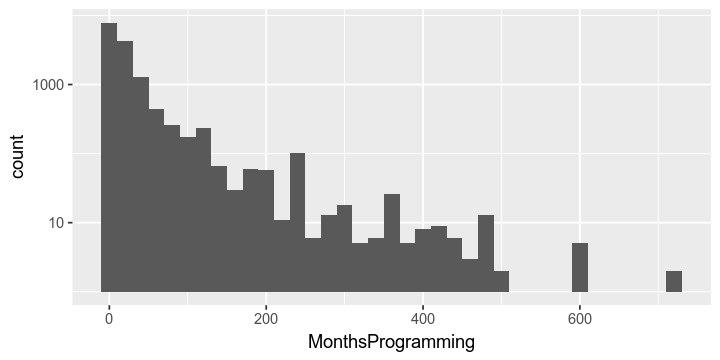

In [95]:
#Months Programming
survey %>%
  filter(!is.na(MonthsProgramming)) %>%
  ggplot(aes(x= MonthsProgramming)) + geom_histogram(binwidth = 20) + scale_y_log10()

In [96]:
#Summary
survey %>%
  filter(!is.na(MonthsProgramming)) %>%
  select(MonthsProgramming) %>%
  summary()

 MonthsProgramming
 Min.   :  0.00   
 1st Qu.:  3.00   
 Median :  9.00   
 Mean   : 24.43   
 3rd Qu.: 24.00   
 Max.   :720.00   

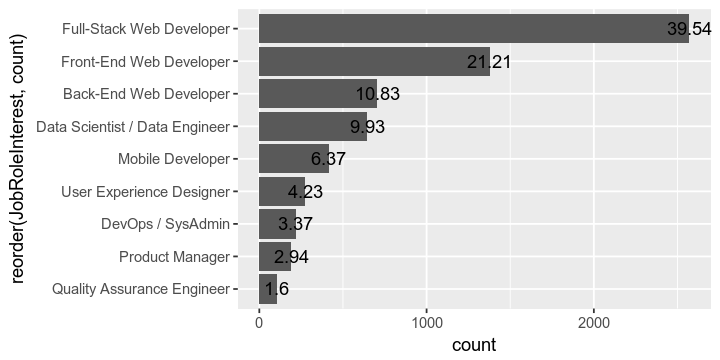

In [68]:
#Job roles interested
survey %>%
  filter(!is.na(JobRoleInterest)) %>%
  group_by(JobRoleInterest) %>%
  summarize(count = n()) %>%
  mutate(pct = count/ sum(count) * 100 ) %>%
  ggplot(aes(x= reorder(JobRoleInterest, count), y = count)) + 
  geom_bar(stat = "identity") + geom_text(aes(label = round(pct, digits= 2))) + coord_flip()

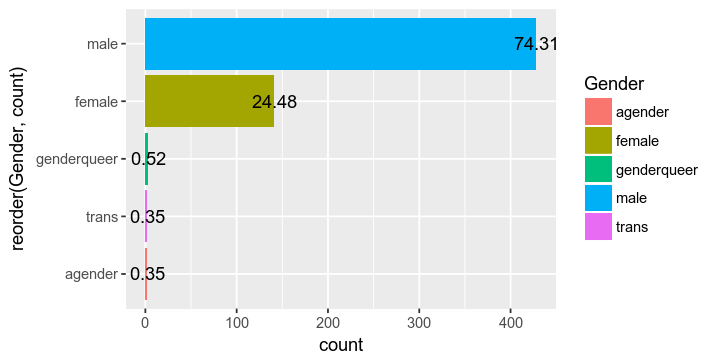

In [69]:
#Data Science Gender wise
survey %>%
  filter(!is.na(Gender),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  group_by(Gender) %>%
  summarize(count = n()) %>%
  mutate(pct = count/ sum(count) * 100 ) %>%
  ggplot(aes(x= reorder(Gender, count), y = count, fill = Gender)) + 
  geom_bar(stat = "identity") + geom_text(aes(label = round(pct, digits= 2))) + coord_flip()

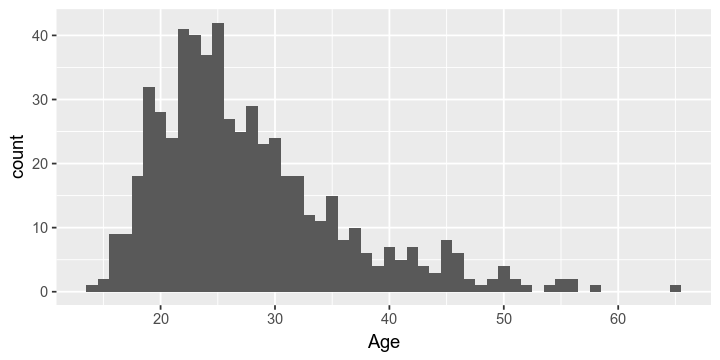

In [83]:
#Age distribution of respondents interested in Data Science/ Data Engineer
survey %>%
  filter(!is.na(Age),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  ggplot(aes(x= Age)) + geom_histogram(binwidth = 1)

In [90]:
#Summary
survey %>%
  filter(!is.na(Age),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  select(Age) %>%
  summary()

      Age       
 Min.   :14.00  
 1st Qu.:22.00  
 Median :26.00  
 Mean   :27.72  
 3rd Qu.:31.25  
 Max.   :65.00  

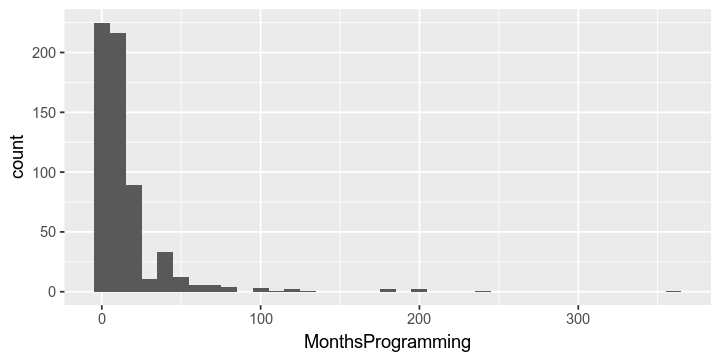

In [87]:
#How many years have you been programming for?
survey %>%
  filter(!is.na(MonthsProgramming),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  ggplot(aes(x= MonthsProgramming)) + geom_histogram(binwidth = 10)

In [89]:
survey %>%
  filter(!is.na(MonthsProgramming),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  select(MonthsProgramming) %>%
  summary()

 MonthsProgramming
 Min.   :  0.00   
 1st Qu.:  3.00   
 Median :  8.00   
 Mean   : 16.17   
 3rd Qu.: 20.00   
 Max.   :360.00   

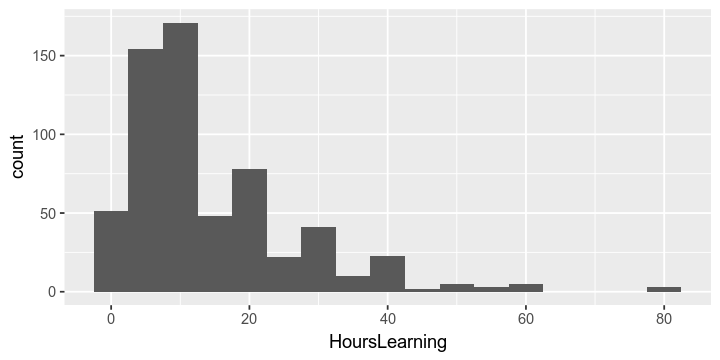

In [98]:
#Hours Spend learning each week
survey %>%
  filter(!is.na(HoursLearning),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  ggplot(aes(x= HoursLearning)) + geom_histogram(binwidth = 5)

In [99]:
#Summary
survey %>%
  filter(!is.na(HoursLearning),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  select(HoursLearning) %>%
  summary()

 HoursLearning  
 Min.   : 0.00  
 1st Qu.: 5.00  
 Median :10.00  
 Mean   :14.41  
 3rd Qu.:20.00  
 Max.   :80.00  

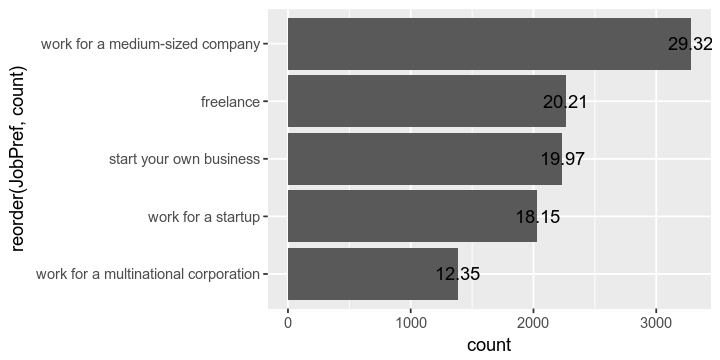

In [102]:
#Job Preference
survey %>%
  filter(!is.na(JobPref)) %>%
  group_by(JobPref) %>%
  summarize(count = n()) %>%
  mutate(pct = count/ sum(count) * 100 ) %>%
  ggplot(aes(x= reorder(JobPref, count), y = count)) + 
  geom_bar(stat = "identity") + geom_text(aes(label = round(pct, digits= 2))) + coord_flip()

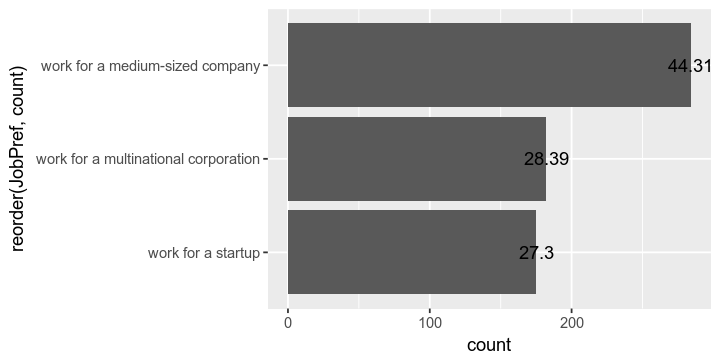

In [105]:
#Job Preference
survey %>%
  filter(!is.na(JobPref),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  group_by(JobPref) %>%
  summarize(count = n()) %>%
  mutate(pct = count/ sum(count) * 100 ) %>%
  ggplot(aes(x= reorder(JobPref, count), y = count)) + 
  geom_bar(stat = "identity") + geom_text(aes(label = round(pct, digits= 2))) + coord_flip()


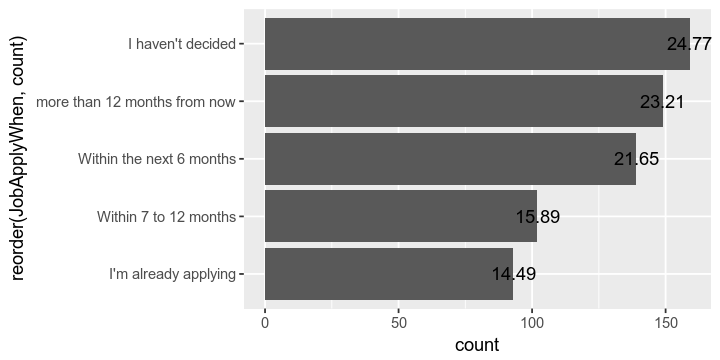

In [106]:
#JobApplyWhen
survey %>%
  filter(!is.na(JobApplyWhen),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  group_by(JobApplyWhen) %>%
  summarize(count = n()) %>%
  mutate(pct = count/ sum(count) * 100 ) %>%
  ggplot(aes(x= reorder(JobApplyWhen, count), y = count)) + 
  geom_bar(stat = "identity") + geom_text(aes(label = round(pct, digits= 2))) + coord_flip()

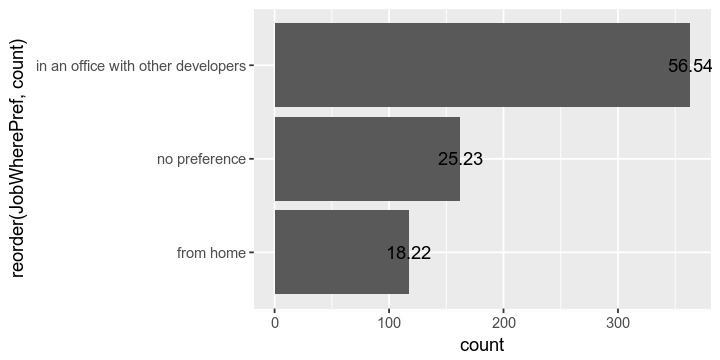

In [107]:
#Job where pref
survey %>%
  filter(!is.na(JobWherePref),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  group_by(JobWherePref) %>%
  summarize(count = n()) %>%
  mutate(pct = count/ sum(count) * 100 ) %>%
  ggplot(aes(x= reorder(JobWherePref, count), y = count)) + 
  geom_bar(stat = "identity") + geom_text(aes(label = round(pct, digits= 2))) + coord_flip()

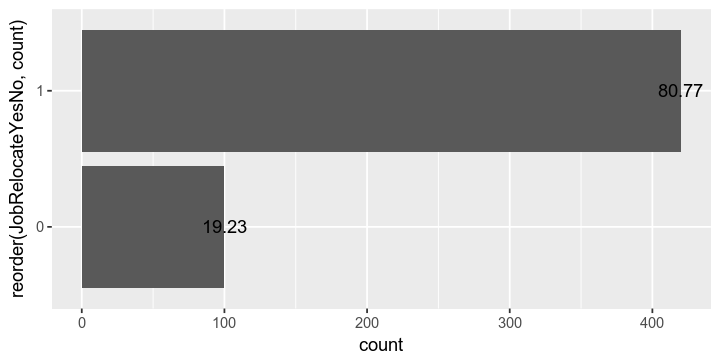

In [108]:
#Relocate
survey %>%
  filter(!is.na(JobRelocateYesNo),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  group_by(JobRelocateYesNo) %>%
  summarize(count = n()) %>%
  mutate(pct = count/ sum(count) * 100 ) %>%
  ggplot(aes(x= reorder(JobRelocateYesNo, count), y = count)) + 
  geom_bar(stat = "identity") + geom_text(aes(label = round(pct, digits= 2))) + coord_flip()

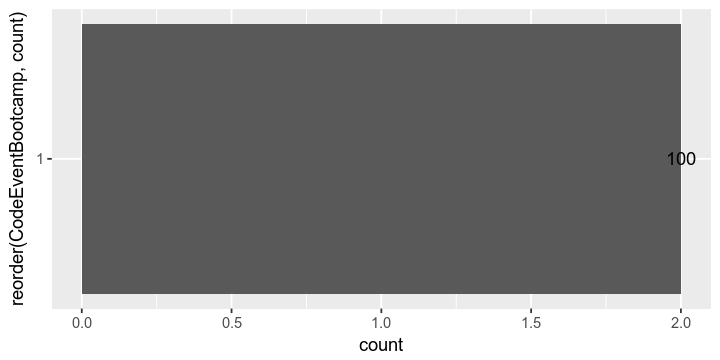

In [111]:
#in-person coding event
survey %>%
  filter(!is.na(CodeEventBootcamp),
        JobRoleInterest == "Data Scientist / Data Engineer") %>%
  group_by(CodeEventBootcamp) %>%
  summarize(count = n()) %>%
  mutate(pct = count/ sum(count) * 100 ) %>%
  ggplot(aes(x= reorder(CodeEventBootcamp, count), y = count)) + 
  geom_bar(stat = "identity") + geom_text(aes(label = round(pct, digits= 2))) + coord_flip()